# 머신러닝(machine learning)
* 인공지능의 한 분야
* SVM, K-means clustering, KNN, 의사결정트리, regression

# 딥러닝(deep learning)
* 머신러닝의 가장 인기있는 분야
* 심층신경망이 1개 이상이면 딥러닝이라한다. 

# 머신러닝 알고리즘의 분류
* 머신러닝 
    * 지도학습(supervised learning) : 학습데이터마다 레이블을 가지고 있음
        * 분류(classification)
        * 회귀(regression)
        * 이상 탐지(anomaly detection)
        * 추천(recommendation)
    * 비지도학습(unsupervised learning) : 학습데이터가 레이블을 가지고 있지 않음
        * 군집(clustering)
        * 차원축소
    * 강화학습(reinforce learning)
    

* 머신러닝의 단점
    * 데이터에 너무 의존적이다. (Garbage in, Gabage out)
* 구글과 페이스북에서 보유하고 있는 데이터로 최적화 된 머신러닝 모델을 다른 회사가 이길 수 있을까?(더 좋은 알고리즘을 가지고 있더라도?)

* R 과 python 비교 - 통계 분석 관점
    * R
        * R 이용자들이 기본적으로 프로그램에 익숙하ㅈ 않다는 가정하에 개발됨
        * 매우 쉽고, 직관적으로 통계 분석 프로그램 작성 가능
* 파이썬 ML을 구성하는 여러 라이브러리
    * 머신러닝 패키지 - 사이킷런
    * 배열/선형대수/통계패키지 -  넘파이 사이파이
    * 데이터핸들링 - 판다스
    * 시각화 = 시본, 맷플롯립


# scikit-learn 공식문서
* https://scikit-learn.org/stable/index.html

# 저자 github
* https://github.com/rickiepark/hg-mldl

# 생선 분류 문제 

## 도미데이터 준비하기 
* binary classification

In [1]:
# 특성 -2개 (bream_length, bream_weight), 도미데이터 - 35개
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

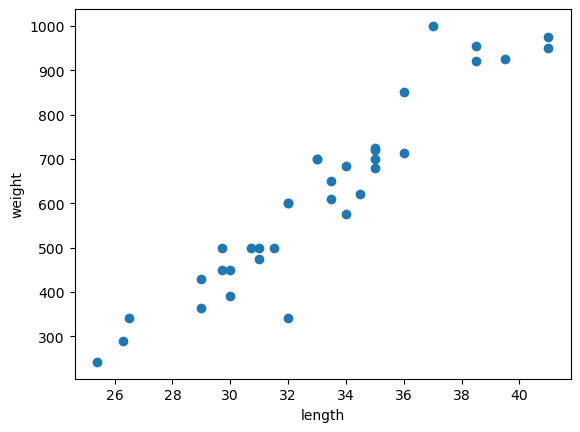

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 빙어 데이터 준비하기

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
len(smelt_length)

14

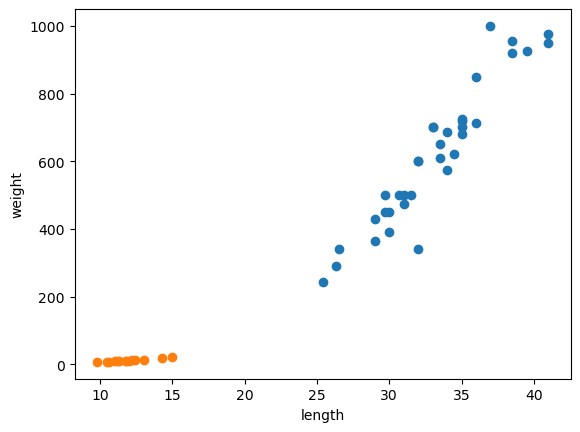

In [5]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

In [6]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [7]:
fish_data = [[l, w] for l,w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [8]:
# 규칙을 찾으려면 정답을 알려주어야 머신이 규칙을 찾습니다.  
# 도미를 찾으려고 하므로 도미=1, 빙어=0
# 찾으려 하는 데이터를 1로 놓는다.
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# k-최근접 이웃 알고리즘( KNN, K Nearest Neighbors )
* k는 작고 홀수를 사용
* 최근접 서클 안에 더 많은 부분으로 예측(predict) ( 서클안에 도미가 더 많으면 도미로, 빙어가 더 많으면 빙어로 분류)
* kNN 알고리즘은 k개의 가장 근접한 이웃을 기반으로 분류하는 알고리즘
* 만약 k = 4 이면 계산을 다시 해야하므로 knn은 홀수를 사용한다.
* 가까운 거리 계산 (유클리디안 거리방식)

## KNN의 특징
* 일반적으로 kneighbors 분류기에 중요한 매개변수는 두개이다.
* 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수이다
* 거리를 재는 방법은 유클리디안 거리방식을 사용한다. 
* knn의장점은 이해햐기 쉬운 모델이라는것
* 하지만 이해하기엔쉽지만 예측이 느리고 많은 특성을 처리하는 능력은 부족하다.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [10]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [11]:
kn.score(fish_data, fish_target)    #100% 다맞춘것.

1.0

# 새로운 생선 예측

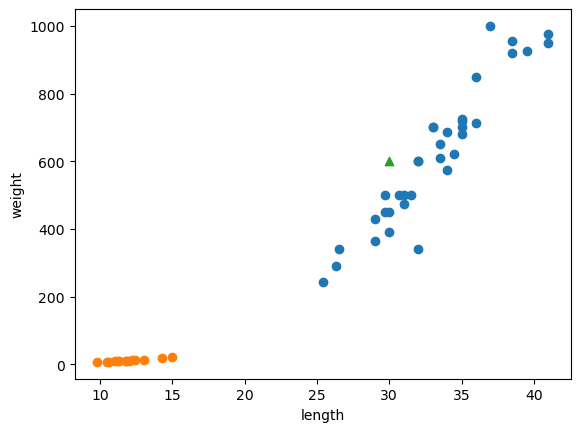

In [12]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter( 30, 600, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
# fit(2차원)
# predict도 2차원 데이터(배열)로 넣어주어야 합니다. 
# knn주위의 클래스를 보고 결정, 기본값은 5
kn.predict([[30,600]])

array([1])

In [14]:
print(kn._fit_X)   #kn이 가지고있는 속성

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [15]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
kn49 = KNeighborsClassifier(n_neighbors = 49)     # 괄호() 안에서 shift + tab 하면 사용할 수 있는 속성을 확인할 수 있음

In [17]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [18]:
print(35/49)

0.7142857142857143


# 확인문제

In [19]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939


## 훈련데이터와 테스트데이터

In [24]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [58]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [61]:
fish_target = [1]*35 + [0]*14

In [62]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [63]:
print(fish_data[4])

[29.0, 430.0]


In [67]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [68]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [69]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [70]:
# 데이터를 train(0:35) 35개와 test(35: ) 15개 셋으로 나눔
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35: ]
test_target = fish_target[35:]  

In [71]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)   #15개의 빙어 데이터

0.0

In [72]:
kn.predict([[30, 600]])  # 도미는 도미로 잘 예측

array([1])

In [73]:
kn.predict([[9.8, 19.9]])   #빙어를 도미로 예측

array([1])

## 넘파이

In [74]:
import numpy as np
np.random.seed(42)   # 결과를 책또는 수업화면과 동일하게 재현하기 위해 seed를 준다

In [75]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [76]:
input_arr.ndim   # ndim: 차원의 수

2

In [77]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [78]:
# 행, 열
print(input_arr.shape)

(49, 2)


In [79]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [80]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [81]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [82]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [83]:
# 13번째 인덱스, train_input[0]값을 가지고 있음
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [84]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

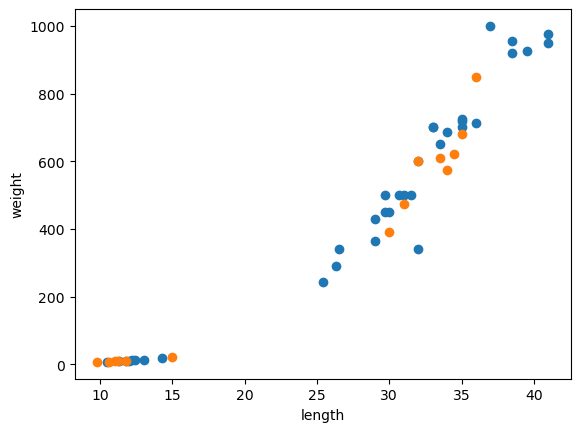

In [85]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:, 1])    #train
plt.scatter(test_input[:,0], test_input[:, 1])     #test
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두번째 머신러닝 프로그램

In [86]:
kn = kn.fit(train_input, train_target )

In [87]:
kn.score(test_input, test_target)

1.0

In [88]:
kn.predict(test_input)     # knn이 예측한 값

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [89]:
test_target     #실제값

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [90]:
# 새로운 데이터로 예측
kn.predict([[30, 600]])

array([1])

In [91]:
kn.predict([[9.7, 20]])

array([0])